<a href="https://colab.research.google.com/github/mancai111/Rett_Mouse/blob/main/Neuron_Act_Levels_%2B_Paw_Displacement_Velocities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports and Paths

In [1]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = '/content/drive/My Drive/TestCase/heatmap/'

curr = '/content/drive/My Drive/TestCase/preprocessed_data/'

import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


In [2]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import dot
from scipy import stats
from numpy.linalg import norm
import matplotlib.pyplot as plt
from collections import defaultdict

os.chdir(abspath_curr)
print(os.getcwd())

/content/drive/My Drive/TestCase/heatmap


In [3]:
os.chdir(curr)
print(os.getcwd())

/content/drive/My Drive/TestCase/preprocessed_data


# Neurons and PawMovements

Sample Wild and Sample Rett, for each mouse, align neuron,paws,speed,day together and concatenate, keep a minimum recordings of neurons (the day that has minimum number of available neurons

In [4]:
# Setup Parameters
wild_list = ['NC436-M-WT', 'NC443-M-WT', 'NC506-M-WT', 'NC538-M-WT', 'NC541-M-WT', 'NC542-M-WT', 'NC544-M-WT', 'NC771-M-WT', 'NC772-M-WT', 'NC786-M-WT', 'NC804-M-WT']
rett_list = ['NC437-M-NL', 'NC440-M-NL', 'NC442-M-NL', 'NC539-M-NL', 'NC540-M-NL', 'NC545-M-NL', 'NC770-M-NL', 'NC773-M-NL', 'NC787-M-NL', 'NC790-M-NL', 'NC802-M-NL']

speed_list = ['fup0','fup15','fup30','fup45','fup60',
        'fdown60','fdown45','fdown30','fdown15','fdown0']

In [5]:
days = ['1','2','3','4','5','6','7','8','9','10']

l = wild_list+rett_list

In [ ]:
# align neuron activity, speed, day, paw movements together for a non-rett mouse

mouse = 'NC506-M-WT'

whole = pd.DataFrame()

for i in days:

  basename = '{mouse}-Day{day}_aligned.xlsx'.format(mouse = mouse, day=i)
  PN_WB = pd.ExcelFile(curr+mouse+' alignedNeuronPaw/'+basename)

  p = pd.DataFrame()

  for speed in speed_list:
    
    sample_paw = pd.read_excel(PN_WB, speed+' pawMovement').iloc[:,1:5]
    sample_neuron = pd.read_excel(PN_WB, speed+' neuronActivity').iloc[:,1:]
    sample = pd.concat([sample_neuron, sample_paw], axis=1)
    sample['speed'] = speed

    p = pd.concat([p, sample])
  
  p['day'] = int(i)
  whole = pd.concat([whole, p])

file_name = '/content/drive/My Drive/TestCase/velocity_data/neuron_speed_day_paw_506.csv'
whole.to_csv(file_name, index=False)

In [6]:
# Read saved NC506 neuron+speed+day+paw meta data

nc506 = pd.read_csv('/content/drive/My Drive/TestCase/velocity_data/neuron_speed_day_paw_506.csv')

In [ ]:
# align neuron activity, speed, day, paw movements together for a rett mouse

mouse = 'NC437-M-NL'

whole = pd.DataFrame()

for i in days:

  basename = '{mouse}-Day{day}_aligned.xlsx'.format(mouse = mouse, day=i)
  PN_WB = pd.ExcelFile(curr+mouse+' alignedNeuronPaw/'+basename)

  p = pd.DataFrame()

  for speed in speed_list:
    
    sample_paw = pd.read_excel(PN_WB, speed+' pawMovement').iloc[:,1:5]
    sample_neuron = pd.read_excel(PN_WB, speed+' neuronActivity').iloc[:,1:]
    sample = pd.concat([sample_neuron, sample_paw], axis=1)
    sample['speed'] = speed

    p = pd.concat([p, sample])
  
  p['day'] = int(i)
  whole = pd.concat([whole, p])

file_name = '/content/drive/My Drive/TestCase/velocity_data/neuron_speed_day_paw_437.csv'
whole.to_csv(file_name, index=False)

In [7]:
# Read saved NC437 neuron+speed+day+paw meta data

nc437 = pd.read_csv('/content/drive/My Drive/TestCase/velocity_data/neuron_speed_day_paw_437.csv')

# NC506 NC437 day1 day10

In [8]:
# Rearrange columns

rearrange = nc506[['Lx', 'Ly', 'Rx', 'Ry', 'speed', 'day']]
rearrange_cols = ['Lx', 'Ly', 'Rx', 'Ry', 'speed', 'day']


nc506 = nc506.drop(rearrange_cols, axis = 1)
nc506 = pd.concat([nc506, rearrange], axis = 1)

# all neurons + paws + speed + day
temp_506 = nc506.dropna(axis=1)

# all diffs between neurons + all diffs between paws by frames
displacement_506_1 = temp_506[temp_506['day'] == 1][temp_506.columns[:-2]].diff().dropna()
displacement_506_10 = temp_506[temp_506['day'] == 10][temp_506.columns[:-2]].diff().dropna().reset_index(drop=True)

In [9]:
# Rearrange columns

rearrange = nc437[['Lx', 'Ly', 'Rx', 'Ry', 'speed', 'day']]
rearrange_cols = ['Lx', 'Ly', 'Rx', 'Ry', 'speed', 'day']


nc437 = nc437.drop(rearrange_cols, axis = 1)
nc437 = pd.concat([nc437, rearrange], axis = 1)

# all neurons + paws + speed + day
temp_437 = nc437.dropna(axis=1)

# all diffs between neurons + all diffs between paws by frames
displacement_437_1 = temp_437[temp_437['day'] == 1][temp_437.columns[:-2]].diff().dropna()
displacement_437_10 = temp_437[temp_437['day'] == 10][temp_437.columns[:-2]].diff().dropna().reset_index(drop=True)

## neuron day1-day10

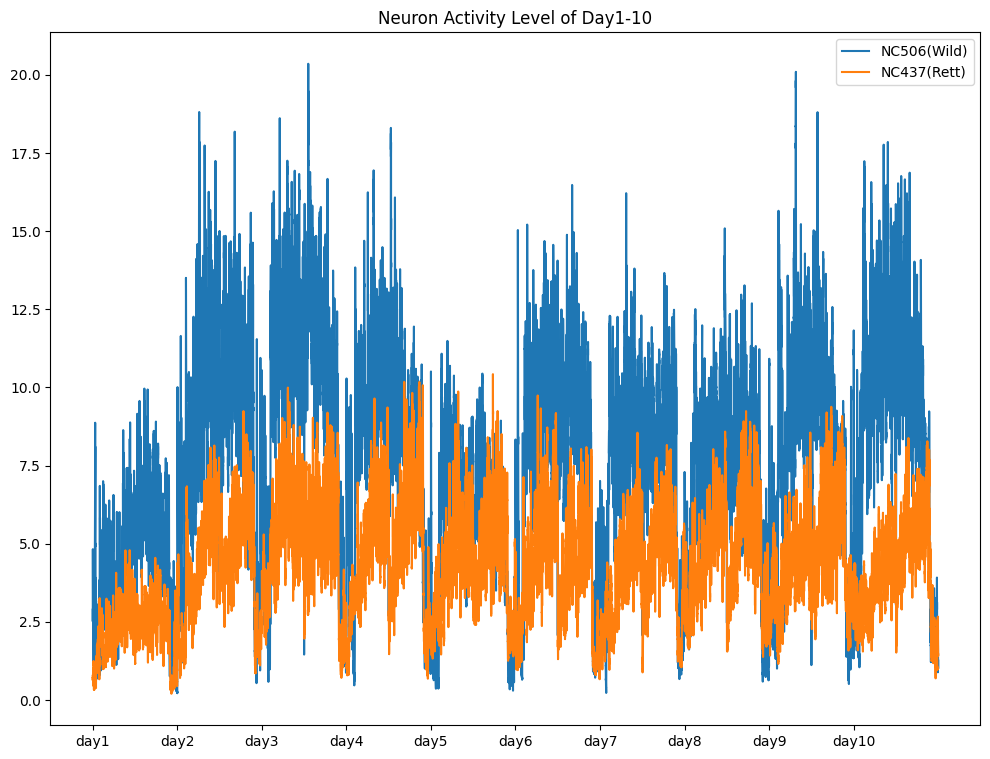

In [27]:
# Plot neuron activities of two mice over 10 days

plt.figure(figsize=(12,9))
plt.plot(temp_506.iloc[:, :-6].mean(axis=1), label = 'NC506(Wild)')
plt.plot(temp_437.iloc[:, :-6].mean(axis=1), label = 'NC437(Rett)')
plt.xticks(np.arange(0, 77100, step=7710), ['day1', 'day2', 'day3', 'day4', 'day5', 'day6', 'day7', 'day8', 'day9', 'day10'])
plt.title('Neuron Activity Level of Day1-10')
plt.legend()
plt.show()

## day1-10 R displacement

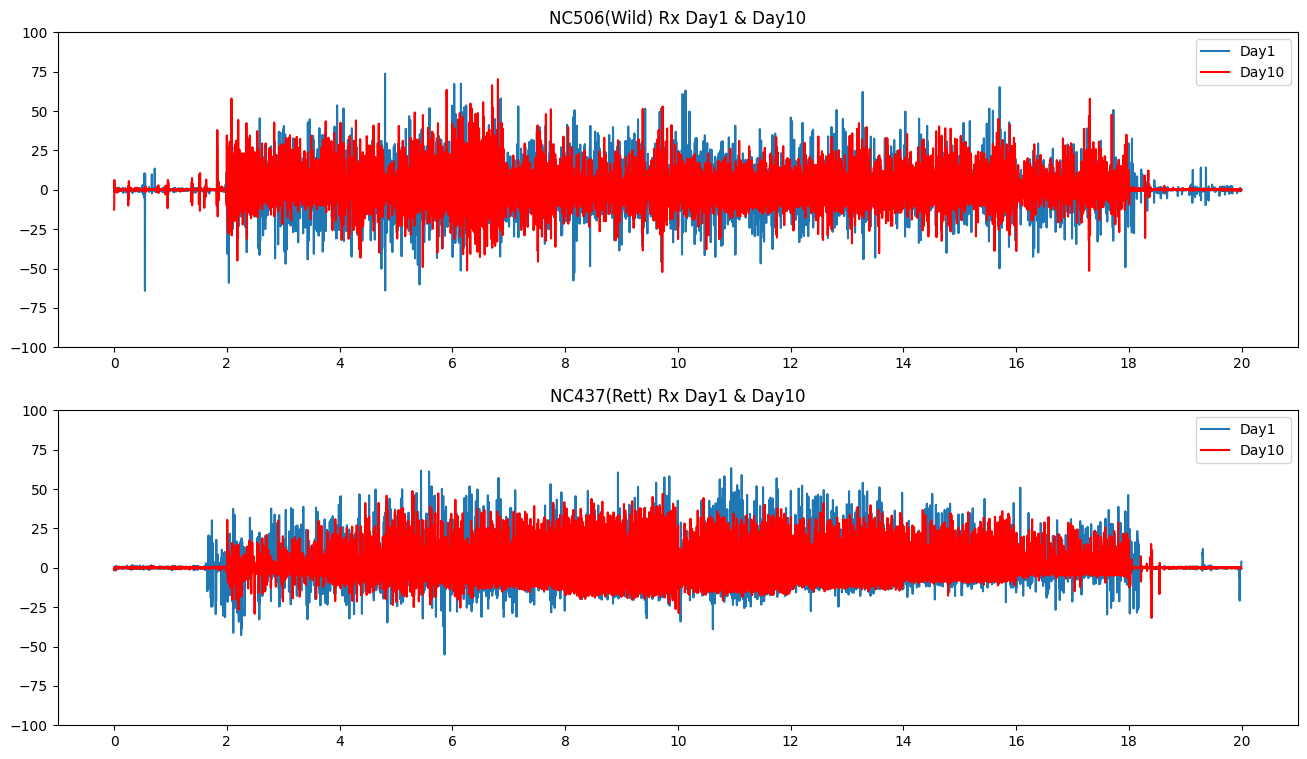

In [11]:
# Plot paw displacement velocities of two mice over 10 days (Rx as example)

fig, ax = plt.subplots(2,1,figsize=(16,9))
# ax[0,0].plot(displacement_506_1['Lx'])
# ax[0,0].plot(displacement_506_10['Lx'], color = 'red')
# ax[0,0].set_ylim([-100,100])
# ax[0,0].set_xticks(np.arange(0, 7711, step=771), ['0', '2', '4', '6', '8', '10', '12', '14', '16', '18','20'])
# ax[0,0].set_title('NC506(Wild) Lx Day1 & Day10')

ax[0].plot(displacement_506_1['Rx'], label = 'Day1')
ax[0].plot(displacement_506_10['Rx'], color = 'red', label = 'Day10')
ax[0].set_ylim([-100,100])
ax[0].set_xticks(np.arange(0, 7711, step=771), ['0', '2', '4', '6', '8', '10', '12', '14', '16', '18','20'])
ax[0].set_title('NC506(Wild) Rx Day1 & Day10')
ax[0].legend()



# ax[1,0].plot(displacement_437_1['Lx'])
# ax[1,0].plot(displacement_437_10['Lx'], color = 'red')
# ax[1,0].set_ylim([-100,100])
# ax[1,0].set_xticks(np.arange(0, 7711, step=771), ['0', '2', '4', '6', '8', '10', '12', '14', '16', '18','20'])
# ax[1,0].set_title('NC437(Rett) Lx Day1 & Day10')

ax[1].plot(displacement_437_1['Rx'], label='Day1')
ax[1].plot(displacement_437_10['Rx'], color = 'red', label='Day10')
ax[1].set_ylim([-100,100])
ax[1].set_xticks(np.arange(0, 7711, step=771), ['0', '2', '4', '6', '8', '10', '12', '14', '16', '18','20'])
ax[1].set_title('NC437(Rett) Rx Day1 & Day10')
ax[1].legend()

plt.show()

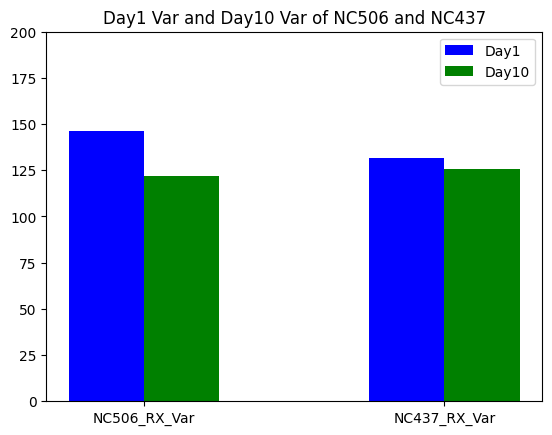

In [12]:
# Var difference between Day1 and Day10 for two mice sparately

data = [
    [displacement_506_1['Rx'].var(), displacement_437_1['Rx'].var()],
[displacement_506_10['Rx'].var(), displacement_437_10['Rx'].var()]
]

X = np.arange(2)
fig = plt.figure()
plt.bar(X - 0.125, data[0], color = 'b', width = 0.25, label = 'Day1')
plt.bar(X + 0.125, data[1], color = 'g', width = 0.25, label = 'Day10')
plt.ylim(0,200)
plt.legend()
plt.xticks(X, ['NC506_RX_Var', 'NC437_RX_Var'])
plt.title('Day1 Var and Day10 Var of NC506 and NC437')
plt.show()

# Counts of Neurons Barplot

In [12]:
# Caclulate # of neurons for two mice and plot

neuron_count_437 = [len(nc437[nc437['day']==int(i)].dropna(axis=1).columns)-6 for i in days]
neuron_count_506 = [len(nc506[nc506['day']==int(i)].dropna(axis=1).columns)-6 for i in days]

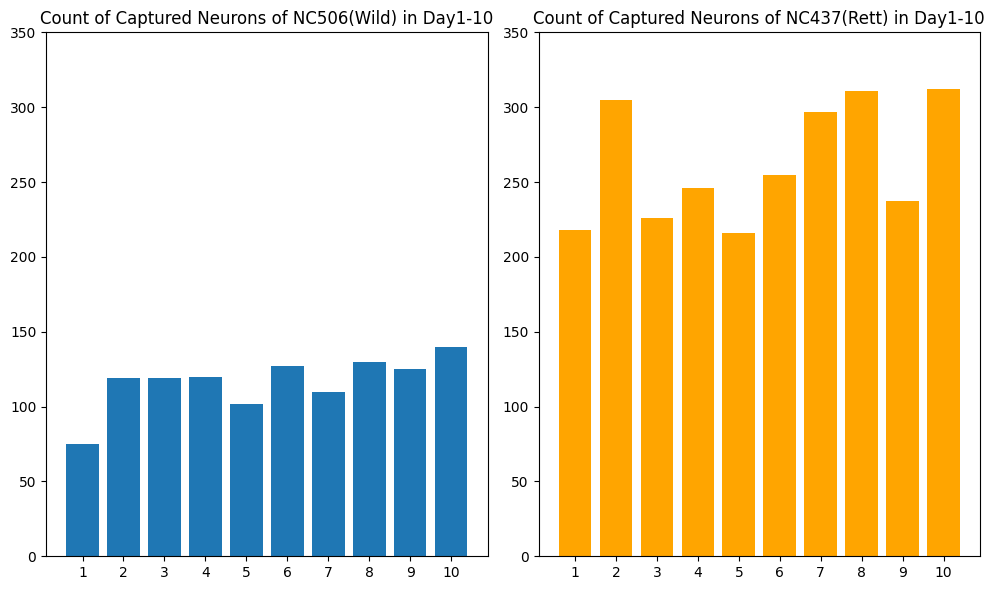

In [14]:
fig, ax = plt.subplots(1,2,figsize=(10,6))


ax[0].bar(days, neuron_count_506)
ax[0].set_ylim([0,350])
ax[0].set_title('Count of Captured Neurons of NC506(Wild) in Day1-10')




ax[1].bar(days, neuron_count_437, color='orange')
ax[1].set_ylim([0,350])
ax[1].set_title('Count of Captured Neurons of NC437(Rett) in Day1-10')
# ax[1].set_xticks(np.arange(0, 7711, step=771), ['0', '2', '4', '6', '8', '10', '12', '14', '16', '18','20'])
# ax[1].set_title('NC437(Rett) Rx Day1 & Day10')
plt.tight_layout()
plt.show()

# Neurons and PawMovements Vol2 (for modelling preparations)

In [24]:
# Procedure of meta dataframe formation

days = ['1','2','3','4','5','6','7','8','9','10']

speed_list = ['fup0','fup15','fup30','fup45','fup60',
        'fdown60','fdown45','fdown30','fdown15','fdown0']

l = wild_list+rett_list

def neuron_velocity_alignment(mouse):

#for mouse in wild_list:

  whole = pd.DataFrame()

  for i in days:

    basename = '{mouse}-Day{day}_aligned.xlsx'.format(mouse = mouse, day=i)
    PN_WB = pd.ExcelFile(curr+mouse+' alignedNeuronPaw/'+basename)

    p = pd.DataFrame()

    for speed in speed_list:
    
      sample_paw = pd.read_excel(PN_WB, speed+' pawMovement').iloc[:,1:5]
      sample_neuron = pd.read_excel(PN_WB, speed+' neuronActivity').iloc[:,1:]
      sample = pd.concat([sample_neuron, sample_paw], axis=1)
      sample['speed'] = speed

      p = pd.concat([p, sample])
  
    p['day'] = int(i)
    whole = pd.concat([whole, p])

  file_name = '/content/drive/My Drive/TestCase/velocity_data/neuron_speed_day_paw_{a}.csv'.format(a=mouse)
  whole.to_csv(file_name, index=False)

In [ ]:
for i in l:
  neuron_velocity_alignment(i)

In [14]:
wild_df_list=[]
for i in wild_list:
  nc = pd.read_csv('/content/drive/My Drive/TestCase/velocity_data/neuron_speed_day_paw_{a}.csv'.format(a=i))
  rearrange = nc[['Lx', 'Ly', 'Rx', 'Ry', 'speed', 'day']]
  rearrange_cols = ['Lx', 'Ly', 'Rx', 'Ry', 'speed', 'day']

  nc = nc.drop(rearrange_cols, axis = 1)
  nc = pd.concat([nc, rearrange], axis = 1)

  temp = nc.dropna(axis=1)

  wild_df_list.append(temp)


In [15]:
rett_df_list=[]
for i in rett_list:
  nc = pd.read_csv('/content/drive/My Drive/TestCase/velocity_data/neuron_speed_day_paw_{a}.csv'.format(a=i))
  rearrange = nc[['Lx', 'Ly', 'Rx', 'Ry', 'speed', 'day']]
  rearrange_cols = ['Lx', 'Ly', 'Rx', 'Ry', 'speed', 'day']

  nc = nc.drop(rearrange_cols, axis = 1)
  nc = pd.concat([nc, rearrange], axis = 1)

  temp = nc.dropna(axis=1)

  rett_df_list.append(temp)


# Neuron Activity align displacement for Rett and Wild

In [16]:
all_rett_mice_neuron_displacement_align = pd.DataFrame()

for test in rett_df_list:

  mouse_neuron_displacement = pd.DataFrame()

  for i in range(1,11):
    displacement_daily = test[test['day'] == i][['Lx','Ly','Rx','Ry']].diff().dropna().reset_index(drop=True)
    neuron_daily = test[test['day'] == i][test.columns[:-6]].iloc[:-1,:].reset_index(drop=True)
    align_daily = pd.concat([neuron_daily, displacement_daily], axis = 1)

    mouse_neuron_displacement = pd.concat([mouse_neuron_displacement, align_daily])

  #mouse_neuron_displacement.dropna().reset_index(drop=True)
  #mouse_neuron_displacement.dropna(axis=1).reset_index(drop=True)

  all_rett_mice_neuron_displacement_align = pd.concat([all_rett_mice_neuron_displacement_align, mouse_neuron_displacement])


In [ ]:
all_rett_mice_neuron_displacement_align_nonan = all_rett_mice_neuron_displacement_align.dropna(axis=1).reset_index(drop=True)

file_name = '/content/drive/My Drive/TestCase/velocity_data/all_neuron_displacement_rett/rett_neuron_displacement.csv'
all_rett_mice_neuron_displacement_align_nonan.to_csv(file_name, index=False)


In [6]:
all_wild_mice_neuron_displacement_align = pd.DataFrame()

for test in wild_df_list:

  mouse_neuron_displacement = pd.DataFrame()

  for i in range(1,11):
    displacement_daily = test[test['day'] == i][['Lx','Ly','Rx','Ry']].diff().dropna().reset_index(drop=True)
    neuron_daily = test[test['day'] == i][test.columns[:-6]].iloc[:-1,:].reset_index(drop=True)
    align_daily = pd.concat([neuron_daily, displacement_daily], axis = 1)

    mouse_neuron_displacement = pd.concat([mouse_neuron_displacement, align_daily])

  #mouse_neuron_displacement.dropna().reset_index(drop=True)
  #mouse_neuron_displacement.dropna(axis=1).reset_index(drop=True)

  all_wild_mice_neuron_displacement_align = pd.concat([all_wild_mice_neuron_displacement_align, mouse_neuron_displacement])

In [7]:
all_wild_mice_neuron_displacement_align_nonan = all_wild_mice_neuron_displacement_align.dropna(axis=1).reset_index(drop=True)

file_name = '/content/drive/My Drive/TestCase/velocity_data/all_neuron_displacement_wild/wild_neuron_displacement.csv'
all_wild_mice_neuron_displacement_align_nonan.to_csv(file_name, index=False)


In [7]:
all_wild_mice_neuron_displacement_align_nonan = pd.read_csv('/content/drive/My Drive/TestCase/velocity_data/all_neuron_displacement_wild/wild_neuron_displacement.csv')
all_wild_mice_neuron_displacement_align_nonan

,0,1,2,3,Lx,Ly,Rx,Ry
0,4.956735e+00,0.002671,2.622682e-03,1.686650e-10,-6.263180,-1.404147,-15.205302,-16.316135
1,4.461061e+00,0.032772,2.360414e-03,1.517986e-10,-0.020720,0.553441,18.751685,3.036076
2,4.379213e+00,1.518950,2.124373e-03,1.366188e-10,1.127532,-1.008668,4.921371,-2.477440
3,3.941292e+00,1.367055,1.911936e-03,1.229570e-10,0.851459,-0.018117,-2.246397,2.897613
4,4.120933e+00,1.230350,1.720742e-03,1.106611e-10,-0.423129,0.239024,-1.050531,1.701022
...,...,...,...,...,...,...,...,...
847985,6.075764e-33,0.772841,2.431538e-10,3.003430e+00,-0.029284,0.330621,-0.157441,-0.071218
847986,5.468180e-33,0.695557,2.188386e-10,3.115742e+00,0.271496,-0.157461,0.303958,-0.026892
847987,4.921355e-33,0.626001,1.969548e-10,2.804168e+00,0.053939,0.077415,-0.258018,0.125526
847988,4.429213e-33,0.563401,1.772591e-10,2.523751e+00,0.253768,0.025324,0.278468,0.041453


In [8]:
all_rett_mice_neuron_displacement_align_nonan = pd.read_csv('/content/drive/My Drive/TestCase/velocity_data/all_neuron_displacement_rett/rett_neuron_displacement.csv')
all_rett_mice_neuron_displacement_align_nonan

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,Lx,Ly,Rx,Ry
0,0.631220,2.978356,2.511858,0.000031,2.261245e-13,6.009316e-03,0.112325,7.297760e-01,1.810722,7.889816e-08,...,0.002546,0.035457,0.000030,1.690652e-30,0.001697,7.226633e-13,-0.971059,-2.303960,0.477738,-4.293036
1,0.568098,2.680520,2.260672,0.023651,2.035122e-13,5.408384e-03,0.101093,6.567984e-01,1.629650,7.100838e-08,...,0.002292,0.031911,0.000027,1.521585e-30,0.001527,6.503973e-13,-0.083979,0.607050,0.272404,0.915767
2,0.841630,2.412468,2.034605,0.021286,1.831610e-13,4.867546e-03,0.090983,5.911185e-01,1.466685,6.390745e-08,...,0.002063,0.028720,0.000024,1.369424e-30,0.001375,5.853578e-13,0.018775,0.628953,-0.886225,1.137958
3,1.132446,2.171221,1.831145,0.019157,1.648450e-13,4.380791e-03,0.081885,5.320066e-01,1.320016,5.751673e-08,...,0.001856,0.025848,0.000022,1.232490e-30,0.001237,5.268223e-13,0.091948,-0.013264,-0.617231,0.062500
4,1.466241,1.954099,1.648030,0.381132,1.483603e-13,3.942712e-03,0.073697,4.788060e-01,1.188015,5.176508e-08,...,0.001671,0.023263,0.000020,1.109239e-30,0.001113,4.741394e-13,-0.035994,-0.235255,-0.582974,0.473057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847985,0.112167,0.136470,2.039487,6.175980,1.050243e+01,3.653444e-22,3.853023,9.796087e-15,0.367862,4.454411e+00,...,0.426672,0.303841,0.000015,3.628365e-01,0.015159,1.656449e+00,0.062526,-0.043982,-0.060907,0.006355
847986,0.100951,0.122823,1.835538,5.616784,9.781089e+00,3.288095e-22,3.467721,8.816482e-15,0.331076,4.226827e+00,...,0.384005,0.273457,0.000014,3.265529e-01,0.013643,1.490804e+00,-0.041021,0.037439,0.092398,-0.115315
847987,0.090856,0.110540,1.651985,5.055106,8.802979e+00,2.959292e-22,4.374433,7.934823e-15,0.297968,3.804144e+00,...,0.345604,0.246111,0.000012,2.938976e-01,0.012279,1.341724e+00,-0.093317,-0.292128,-0.046836,0.067575
847988,0.081770,0.099486,1.486786,6.625682,7.922682e+00,2.663360e-22,3.936990,7.141344e-15,0.268171,3.423730e+00,...,0.311044,0.221500,0.000011,2.645078e-01,0.011051,1.207551e+00,-0.060284,0.349243,-0.125223,0.024933


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression

# Train test split function

def lin_with_and_without_feature_selection(X, y):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
  reg = LinearRegression().fit(X_train, y_train)
  score_no_selection = abs(reg.score(X_test, y_test))

  # X_train, X_test, y_train, y_test = train_test_split(X[features[filter]], y, test_size=0.3, random_state=42)
  # reg = LinearRegression().fit(X_train, y_train)
  # score_with_selection = reg.score(X_test, y_test)

  return score_no_selection

In [10]:
# R2 Score for LR

lin_with_and_without_feature_selection(all_rett_mice_neuron_displacement_align_nonan[all_rett_mice_neuron_displacement_align_nonan.columns[:-4]],all_rett_mice_neuron_displacement_align_nonan['Rx'])

0.0001718022028602828

In [12]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(all_rett_mice_neuron_displacement_align_nonan[all_rett_mice_neuron_displacement_align_nonan.columns[:-4]], 
                                                    all_rett_mice_neuron_displacement_align_nonan['Rx'], 
                                                    test_size=0.3)

rf_regressor = RandomForestRegressor(n_estimators = 5, random_state = 0)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=5, random_state=0)

In [13]:
# Testing Accuracy (R2 Score) for Random Forest Regressor

from sklearn.metrics import r2_score

y_pred = rf_regressor.predict(X_test)
r2_score(y_test, y_pred)

-0.5264578950840184

In [15]:
y_pred

array([ 0.7133908 ,  1.48587159,  4.25615555, ...,  3.5020648 ,
        0.09881525, -0.38684802])

In [17]:
y_test

453085     0.272031
339622    -1.155911
811248    -6.322005
807467    10.292402
805065    -0.587396
            ...    
612722    18.263798
229821     0.260357
658528    -7.131869
632475     0.009782
76917     -0.082083
Name: Rx, Length: 254397, dtype: float64

In [14]:
# Training Accuracy

y_pred_train = rf_regressor.predict(X_train)
r2_score(y_train, y_pred_train)

0.6823147271516072

Project Ends here due to Semester's ending